# Homework 8
---

To start, I experimented with cropping the photos to minimize the influence of the background in each person's image. I seperated the last video's worth of scenes from each persons dataset to use as test data.

Found 74598 files belonging to 10 classes.
Tensor("args_0:0", shape=(128, 72, 3), dtype=float32)
(96, 54, 3)


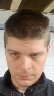

(96, 54, 3)


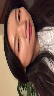

(96, 54, 3)


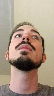

(96, 54, 3)


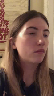

(96, 54, 3)


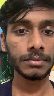

(96, 54, 3)


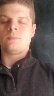

(96, 54, 3)


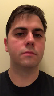

(96, 54, 3)


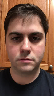

(96, 54, 3)


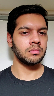

(96, 54, 3)


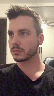

In [23]:
import tensorflow as tf
from tensorflow import data
from PIL import Image
import numpy as np


dataset_T = tf.keras.preprocessing.image_dataset_from_directory(
    "./images",
    image_size=(128, 72),
    shuffle=True,
    seed=222,
    label_mode="categorical",
)

def foo(x, y):
    print(x)
    return (tf.image.central_crop(x, 0.75), y)

img = dataset_T.unbatch().take(10).map(foo).as_numpy_iterator()

for i in img:
    print(i[0].shape)
    pil_img = tf.keras.preprocessing.image.array_to_img(i[0])
    display(pil_img)


## Building the Model

The model that was developed was based on a modified version of the model submitted during the MNIST recognition challenege homework. I use the CenterCrop to crop the images, and RandomRotation and RandomFlip layers to augment the images.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop

def create_model():
    model = Sequential()
    model.add(CenterCrop(96, 54, input_shape=(128, 72, 3)))
    model.add(RandomRotation(0.027))
    model.add(RandomFlip())
    model.add(Conv2D(256, 3, activation="relu", padding="same"))
    model.add(Conv2D(256, 3, activation="relu", padding="same"))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, 3, activation="relu", padding="same"))
    model.add(Conv2D(128, 3, activation="relu", padding="same"))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, activation="relu", padding="same"))
    model.add(Conv2D(64, 3, activation="relu", padding="same"))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dense(500, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [25]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import data
import numpy as np


dataset_T = tf.keras.preprocessing.image_dataset_from_directory(
    "./images",
    image_size=(128, 72),
    shuffle=True,
    seed=7,
    label_mode="categorical",
)

dataset_V = tf.keras.preprocessing.image_dataset_from_directory(
    "./test_images",
    image_size=(128, 72),
    shuffle=True,
    seed=7,
    label_mode="categorical",
)

dataset_V = dataset_V.map(lambda x, y: (x / 255.0, y))
dataset_T = dataset_T.map(lambda x, y: (x / 255.0, y))

callback = ModelCheckpoint(
    "./weights/weights_cropped_wide3.{epoch:02d}-{val_loss:.5f}.hdf5",
    save_best_only=True,
    save_weights_only=True,
)
callback_list = [callback]

model = create_model()
model.load_weights('./weights\\weights_cropped_wide2.03-0.81990.hdf5')
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

print(model.summary())

model.fit(
    dataset_T,
    batch_size=32,
    validation_data=dataset_V,
    epochs=3,
    verbose=5,
    callbacks=callback_list,
)

score = model.evaluate(dataset_V)
print('Score: ' + str(score))

Found 74598 files belonging to 10 classes.
Found 16901 files belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
center_crop (CenterCrop)     (None, 96, 54, 3)         0         
_________________________________________________________________
random_rotation (RandomRotat (None, 96, 54, 3)         0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 96, 54, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 54, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 54, 256)       590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 27, 256)       0         
____________________________________

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.load_weights('./weights/weights_cropped_wide.03-1.47559.hdf5')

dataset_T = tf.keras.preprocessing.image_dataset_from_directory(
    "./images",
    image_size=(128, 72),
    shuffle=True,
    seed=8,
    label_mode="categorical",
)

dataset_V = tf.keras.preprocessing.image_dataset_from_directory(
    "./test_images",
    image_size=(128, 72),
    shuffle=True,
    seed=8,
    label_mode="categorical",
)

dataset_V = dataset_V.map(lambda x, y: (x / 255.0, y))
dataset_T = dataset_T.map(lambda x, y: (x / 255.0, y))

callback = ModelCheckpoint(
    "./weights/weights_cropped_wide.{epoch:02d}-{val_loss:.5f}.hdf5",
    save_best_only=True,
    save_weights_only=True,
)
callback_list = [callback]

model.fit(
    dataset_T,
    batch_size=32,
    validation_data=dataset_V,
    epochs=3,
    verbose=5,
    callbacks=callback_list,
)

score = model.evaluate(dataset_V)
print('Score: ' + str(score))

Found 74598 files belonging to 10 classes.
Found 16901 files belonging to 10 classes.
Epoch 1/3
Epoch 2/3
Epoch 3/3


InternalError: GPU sync failed

In [22]:
model.load_weights('./weights/weights_cropped2.01-4.08279.hdf5')

score = model.evaluate(dataset_V)
print('Score: ' + str(score))

529/529 [==============================] - 71s 134ms/step - loss: 4.0828 - accuracy: 0.7788
Score: [4.0827836990356445, 0.7787705063819885]
